# SEGMENTACION SIMPLE POR COLOR
Ejemplo introductorio para procesamiento de imágenes, permite seleccionar parametros de pesos de canales, rangos y umbrales para delimitar zonas de color y sobreimprime sobre la imagen original.

Autor: Serafini, Martin Nicolas

Abril 2025

In [1]:
# Instalo las bibliotecas requeridas
!pip install scikit-image watermark -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.8 MB/s eta 0:00:00


In [2]:
# Bibliotecas necesarias
import numpy as np
from cv2 import imread
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from ipywidgets import interact, Checkbox, Dropdown, IntSlider

In [3]:
# Informacion del entorno
%load_ext watermark
%watermark
%watermark --iversions

Last updated: 2025-04-15T15:45:30.397955+00:00

Python implementation: CPython
Python version       : 3.11.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.85+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

ipywidgets: 7.7.1
numpy     : 2.0.2
matplotlib: 3.10.0
google    : 2.0.3



In [4]:
# Función para analizar características de la imagen
def info_img(img):
    print('tamaño =', img.shape)
    print('máximo =', np.max(img))
    print('mínimo =', np.min(img))

##CARGA DE LA IMAGEN

###LOGO

--2025-04-15 15:45:30--  https://1000marcas.net/wp-content/uploads/2019/12/7UP-Logo-1987.jpg
Resolving 1000marcas.net (1000marcas.net)... 104.21.96.1, 104.21.112.1, 104.21.48.1, ...
Connecting to 1000marcas.net (1000marcas.net)|104.21.96.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23462 (23K) [image/jpeg]
Saving to: ‘7UP-Logo-1987.jpg’

7UP-Logo-1987.jpg   100%[===================>]  22.91K  --.-KB/s    in 0.006s  

2025-04-15 15:45:31 (3.71 MB/s) - ‘7UP-Logo-1987.jpg’ saved [23462/23462]



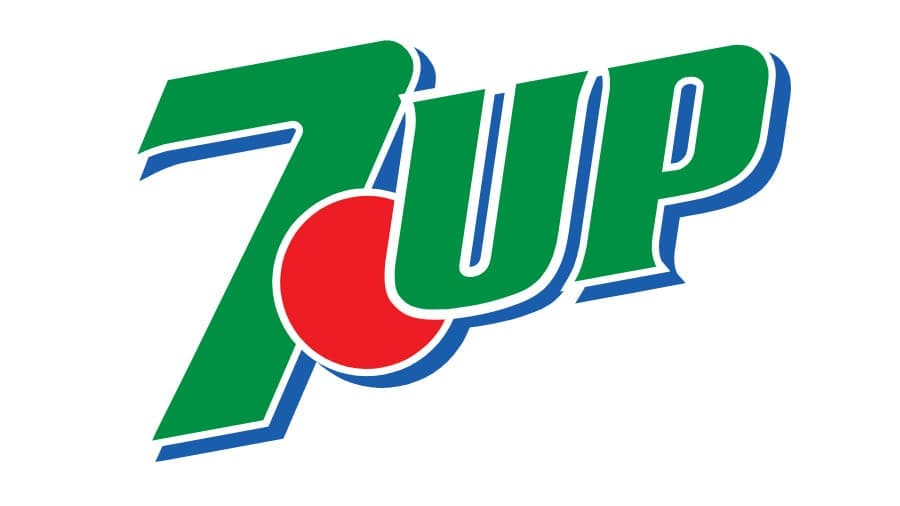

tamaño = (506, 900, 3)
máximo = 255
mínimo = 0


In [5]:
!wget https://1000marcas.net/wp-content/uploads/2019/12/7UP-Logo-1987.jpg
img_cv = imread('7UP-Logo-1987.jpg')
cv2_imshow(img_cv)
info_img(img_cv)

###FLORES

In [6]:
#!wget https://www.dropbox.com/s/jetlnfihles3g7k/flowers.jpg
#img_cv = imread('flowers.jpg')
#cv2_imshow(img_cv)
#info_img(img_cv)

###FOTO

In [7]:
#!wget https://img.freepik.com/foto-gratis/primer-plano-cara-mujer-joven-que-mira-arriba-contra-contexto-azul_23-2148178068.jpg
#img_cv = imread('primer-plano-cara-mujer-joven-que-mira-arriba-contra-contexto-azul_23-2148178068.jpg')
#cv2_imshow(img_cv)
#info_img(img_cv)

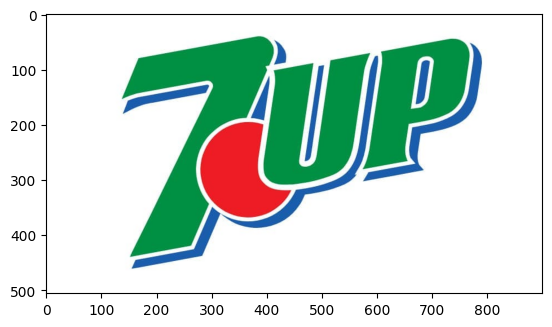

In [8]:
# Conversión BGR a RGB
img = img_cv[:,:,[2,1,0]]          # BGR a RGB
plt.imshow(img)
plt.show()

##SEPARACION CANALES DE COLOR

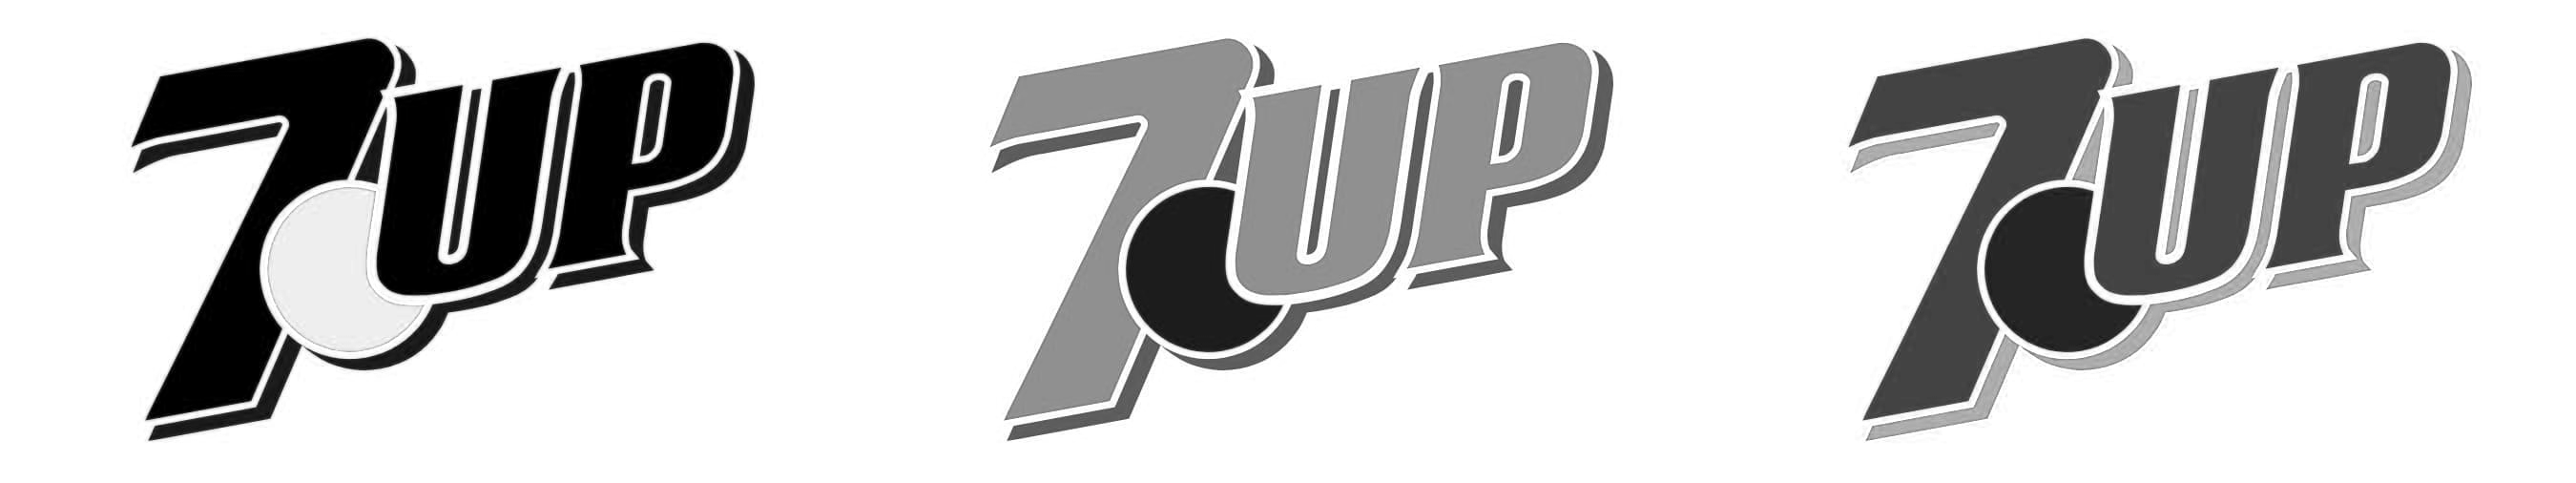

In [9]:
# Separación de canales de color
rojo = img[:,:,0]
verde = img[:,:,1]
azul = img[:,:,2]
canales = np.concatenate((rojo,verde,azul),axis=1)
cv2_imshow(canales)

##AJUSTE DE PESOS DE LOS CANALES DE COLOR
Esta función toma tres canales de una imagen y los convierte a escala de grises usando un promedio ponderado. El usuario puede ajustar los pesos para cada canal de forma interactiva. La función muestra la imagen resultante, actualiza y retorna una lista con los pesos utilizados. Esto permite experimentar con diferentes combinaciones y observar su efecto sobre la imagen en escala de grises.**texto en negrita**

In [10]:
pesos = []
def procesar(peso_rojo=0.33,peso_verde=0.33,peso_azul=0.33):
    # Conversión a escala de grises
    # Se convierte a flotante para hacer calculos mas precisos sin perdidas por redondeos de forma prematura
    rojo_f = rojo.astype(float)
    verde_f = verde.astype(float)
    azul_f = azul.astype(float)
    # pesos alternativos
    #   peso = (1/3,1/3,1/3)
    #   peso = (0.1,0.4,0.5)
    # Promedio ponderado
    gris_f = peso_rojo*rojo_f + peso_verde*verde_f + peso_azul*azul_f
    gris = gris_f.astype(int)
    info_img(gris)
    cv2_imshow(gris)
    pesos.clear()
    pesos.append(peso_rojo)
    pesos.append(peso_verde)
    pesos.append(peso_azul)
    return pesos

widget = interact(procesar,peso_rojo=(0, 1, 0.01),peso_verde=(0, 1, 0.01),peso_azul=(0, 1, 0.01))

interactive(children=(FloatSlider(value=0.33, description='peso_rojo', max=1.0, step=0.01), FloatSlider(value=…

La idea es combinar la información de los tres canales para calcular el nivel de gris de cada píxel. Cada canal aporta su contribución multiplicada por un factor (peso) que refleja su importancia en el resultado final.

Por defecto se  asigna 1/3 a cada canal.

[0.33, 0.33, 0.33]


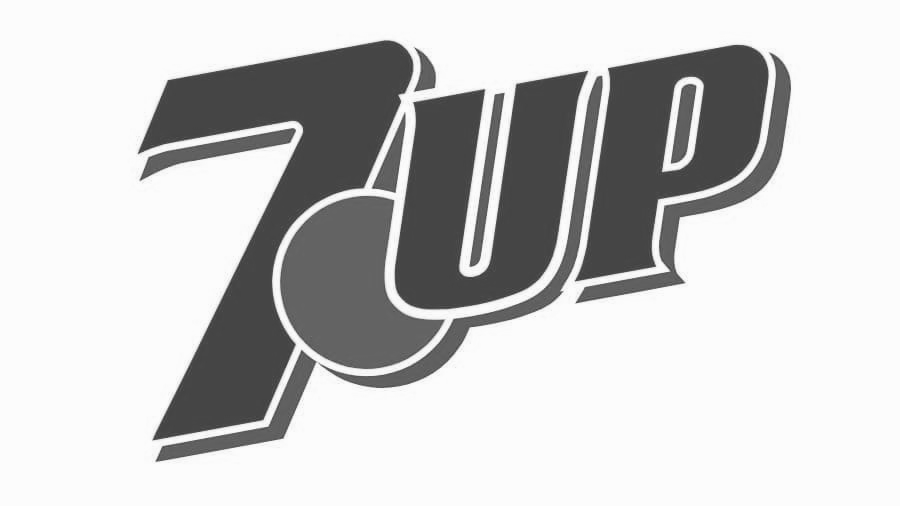

In [11]:
#muestro por pantalla los pesos que seleccione en la etapa anterior y genero la imagen
print(pesos)
rojo_f = rojo.astype(float)
verde_f = verde.astype(float)
azul_f = azul.astype(float)
gris_f = pesos[0]*rojo_f + pesos[1]*verde_f + pesos[2]*azul_f
gris = gris_f.astype(int)
cv2_imshow(gris)

In [12]:
# Función para mostrar histograma
def histograma(X):
    X = np.clip(X, 0, 255).astype(int)  # Asegura que los valores estén entre 0-255
    (N, M) = X.shape
    h = np.zeros((256,))
    for i in range(N):
        for j in range(M):
            x = X[i, j]
            h[x] += 1
    plt.plot(range(256), h)
    plt.title('Histograma')
    plt.xlabel('Valor de pixel')
    plt.ylabel('Frecuencia')
    plt.show()

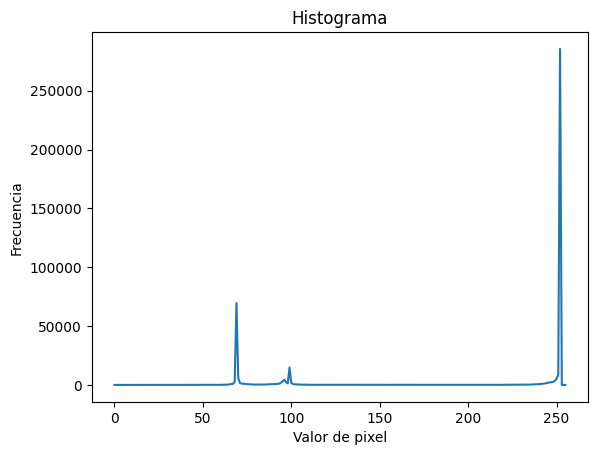

In [13]:
histograma(gris)

El histograma da una visión cuantitativa de cómo se distribuyen los niveles de gris en la imagen.
* Si la mayor parte de la imagen está en tonos oscuros, verás picos en los valores bajos.
* Si la imagen es muy brillante, el histograma se desplazará hacia los valores altos.

##SEGMENTACION DE LA IMAGEN
La funcion segmenta una imagen tomando la información de los tres canales de color y aplicando umbrales a cada uno para obtener máscaras booleanas de segmentación y pudiendo elegir si esos umbrales determinal el misnimo o el maximo (mayor o menor que el umbral).
Luego se concatenan las tres máscaras horizontalmente para visualizar juntas el resultado.

El el caso del logo se quiere segmentar el color azul, por defecto los valores son los que encontre optimos pero utilizando los sliders se pueden segmentar otros colores.

In [14]:
# Segmentación de la chica
segmentacion_datos = []
def segmentar(valor_rojo=219, operacion_rojo="menor",
              valor_verde=159, operacion_verde="menor",
              valor_azul=122, operacion_azul="mayor"):

    # En funcion del umbral elegido y la operacion hace elproceso sobre el canal
    seg_r = rojo > valor_rojo if operacion_rojo == "mayor" else rojo < valor_rojo
    seg_v = verde > valor_verde if operacion_verde == "mayor" else verde < valor_verde
    seg_a = azul > valor_azul if operacion_azul == "mayor" else azul < valor_azul
    seg_rgb = np.concatenate((seg_r, seg_v, seg_a), axis=1)
    cv2_imshow(seg_rgb * 255)

    seg_rv = np.logical_and(seg_r,seg_v)
    seg = np.logical_and(seg_rv,seg_a)
    cv2_imshow(seg*255)

    # Genero la lista con los datos de la seleccion para poder exportar a pasos siguientes
    segmentacion_datos.clear()
    segmentacion_datos.append((valor_rojo, operacion_rojo))
    segmentacion_datos.append((valor_verde, operacion_verde))
    segmentacion_datos.append((valor_azul, operacion_azul))
    return segmentacion_datos

widget2 = interact(segmentar,
                   valor_rojo=(0, 255, 1), operacion_rojo=["mayor", "menor"],
                   valor_verde=(0, 255, 1), operacion_verde=["mayor", "menor"],
                   valor_azul=(0, 255, 1), operacion_azul=["mayor", "menor"])

interactive(children=(IntSlider(value=219, description='valor_rojo', max=255), Dropdown(description='operacion…

Con la los valores seleccionados se devuelve la lista para seguir con el proceso, es la forma de hacerlo dado que por si solo los cambios introducidos a las variables en la interaccion son locales.

Datos segmentacion: [(219, 'menor'), (159, 'menor'), (122, 'mayor')]


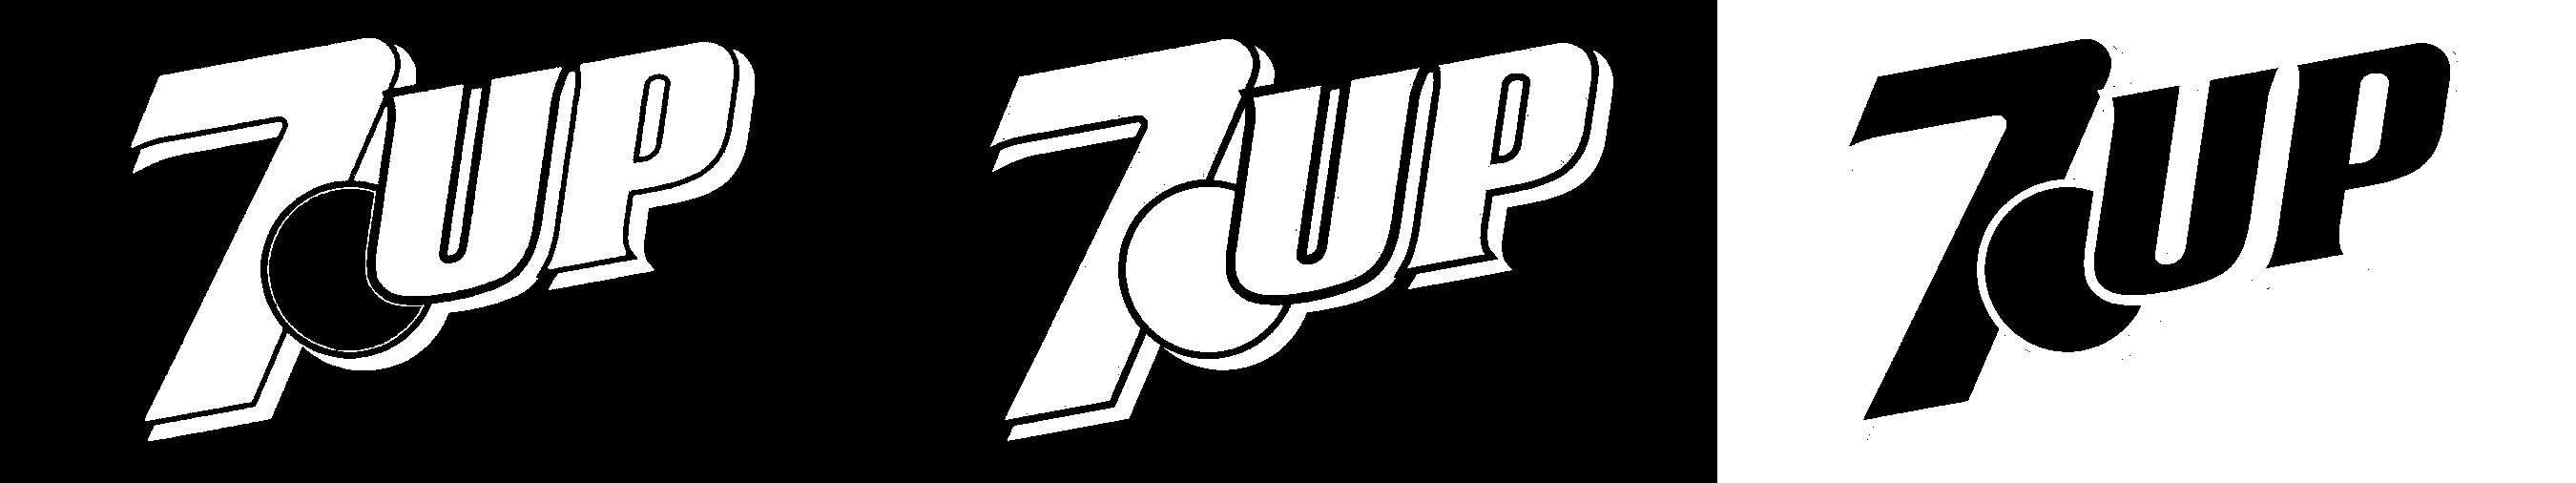

In [15]:
# La lista esta compuestas por sublistas por cada canal que incluye el umbral y la operacion
print(f'Datos segmentacion: {segmentacion_datos}')

# Segmentación por canal basada en datos_segmentacion
seg_r = rojo < segmentacion_datos[0][0] if segmentacion_datos[0][1] == "menor" else rojo > segmentacion_datos[0][0]
seg_v = verde < segmentacion_datos[1][0] if segmentacion_datos[1][1] == "menor" else verde > segmentacion_datos[1][0]
seg_a = azul < segmentacion_datos[2][0] if segmentacion_datos[2][1] == "menor" else azul > segmentacion_datos[2][0]

# Concatena las segmentaciones y mostrar la imagen
seg_rgb = np.concatenate((seg_r, seg_v, seg_a), axis=1)
cv2_imshow(seg_rgb * 255)

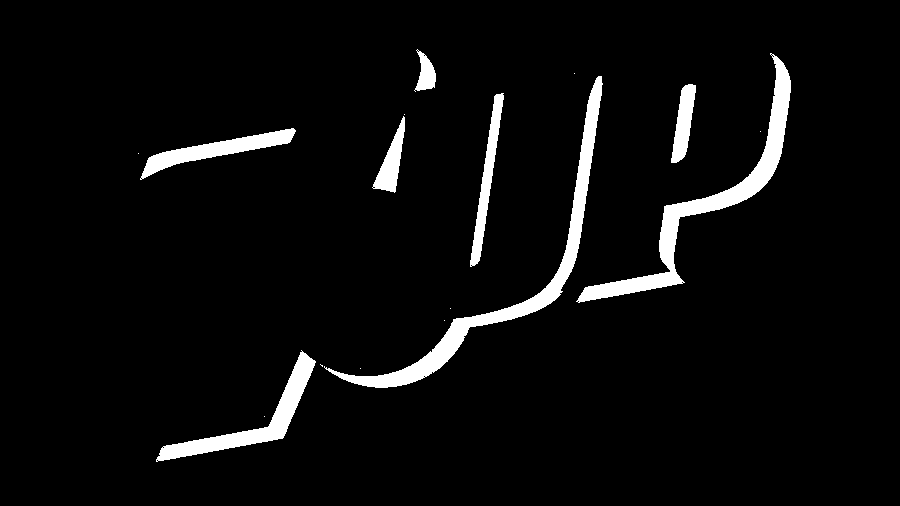

In [16]:

seg_rv = np.logical_and(seg_r,seg_v)
seg = np.logical_and(seg_rv,seg_a)
cv2_imshow(seg*255)



##ELIMINACION PIXELES AISLADOS


###LIMPIEZA PIXELES AISLADOS EN FILAS
La funcion recorre cada fila de la imagen de segmentación seg y, si una fila contiene menos píxeles activos que los determinados en el umbral, la elimina (estableciéndola a 0) en una copia de la imagen. Esto ayuda a eliminar ruido o pequeños grupos de píxeles que podrían afectar la detección de bordes, mostrando finalmente la imagen resultante en blanco y negro.

El logo es una imagen limpia por lo que por default esta en 0, pero modificando el valor afecta la imagen procesada.

In [17]:
# Eliminación de píxeles aislados
datos_umbrales = []
def eliminar_pixeles(umbral_fila=0):
    # Se sacan los datos de alto y ancho de la imagen
    (N,M) = seg.shape
    # Se crea una copia para no afectar al original con el proceso
    limpia = seg.copy()
    # Se itera cada fila de la imagen
    for i in range(N):
        # Calcula la suma de los valores de la fila i en la imagen seg.
        s = np.sum(seg[i,:])
        # Si la suma s es menor al umbral la elimina convirtiendo toda la fila en 0s
        if s<umbral_fila:
            limpia[i,:] = 0

    # Muestra la imagen limpiada
    cv2_imshow(limpia*255)

    # Limpio y Actualizo la lista con el valor del umbral
    datos_umbrales.clear()
    datos_umbrales.append(umbral_fila)
    # Devuelvo la lista
    return datos_umbrales

interact(eliminar_pixeles, umbral_fila=(0,300,1) )

interactive(children=(IntSlider(value=0, description='umbral_fila', max=300), Output()), _dom_classes=('widget…

<function __main__.eliminar_pixeles(umbral_fila=0)>

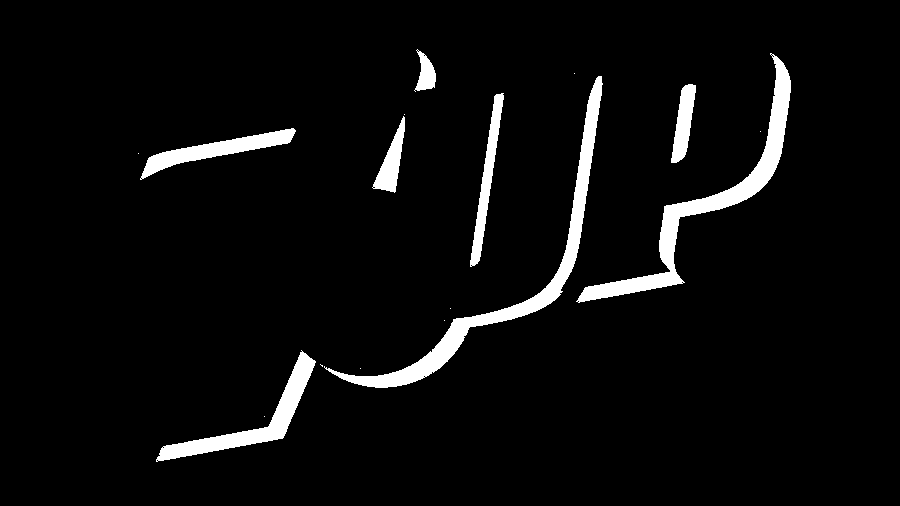

In [18]:
# Eliminación de píxeles aislados
(N,M) = seg.shape
limpia = seg.copy()
for i in range(N):
    s = np.sum(seg[i,:])
    if s<datos_umbrales[0]:
        limpia[i,:] = 0
cv2_imshow(limpia*255)

##GENERACION DEL RECTANGULO

##RECTANGULO DELIMITADOR


In [19]:
# Búsqueda de coordenadas del rectángulo
i_min = 1000
i_max = 0
j_min = 1000
j_max = 0
for i in range(N):
    for j in range(M):
        if limpia[i,j]>0:
            if i<i_min: i_min = i
            if i>i_max: i_max = i
            if j<j_min: j_min = j
            if j>j_max: j_max = j

Se opto por segmentar el color azul en el caso del logo de 7up

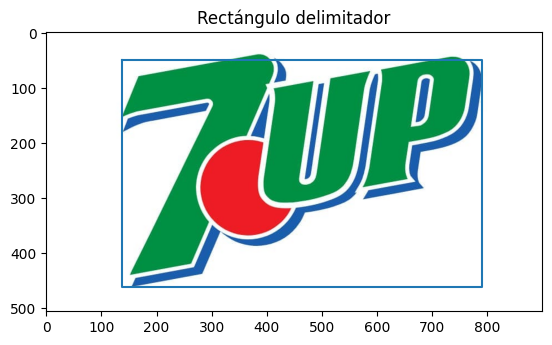

In [20]:
# Dibujo del rectángulo
y = [i_min,i_min,i_max,i_max,i_min]
x = [j_min,j_max,j_max,j_min,j_min]
plt.imshow(img)
plt.plot(x,y)
plt.title('Rectángulo delimitador')
plt.show()

##DETECCION DE LOS BORDES

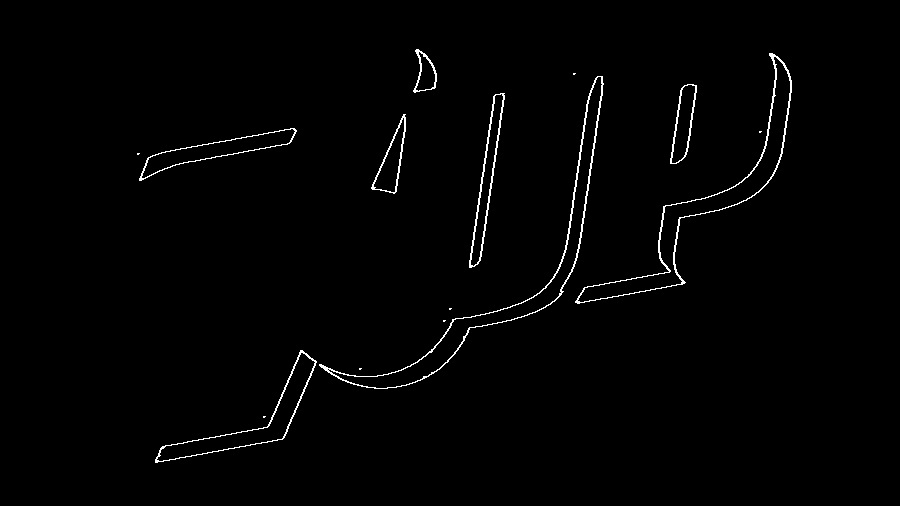

In [21]:
# Detección de bordes
borde = np.zeros((N,M),np.uint8)
# Bordes horizontales
for i in range(N):
    for j in range(1,M):
        if limpia[i,j]!=limpia[i,j-1]:
            borde[i,j] = 1
            borde[i,j-1] = 1
# Bordes verticales
for i in range(1,N):
    for j in range(M):
        if limpia[i-1,j]!=limpia[i,j]:
            borde[i,j] = 1
            borde[i,j-1] = 1
cv2_imshow(borde*255)

##BORDES SOBREIMPRESOS EN LA IMAGEN

Se introdce la opcion de elegir el color del borde

In [22]:
# Diccionario de colores en RGB para los bordes
colores = {
    'Blanco': (255, 255, 255),
    'Negro': (0, 0, 0),
    'Rojo': (0, 0, 255),
    'Azul': (255, 0, 0),
    'Verde': (0, 255, 0),
    'Amarillo': (0, 255, 255)
}

# Funcion para sobreimprimir el borde a la imagen
def mostrar_con_borde(color_nombre):
    color = colores[color_nombre]
    img_final = img_cv.copy()
    for i in range(N):
        for j in range(M):
            if borde[i, j] == 1:
                img_final[i, j, :] = color
    cv2_imshow(img_final)

# Llamo a la funcion con un menu desplegable con el color
interact(
    mostrar_con_borde,
    color_nombre=Dropdown(
        options=list(colores.keys()),
        value='Amarillo',
        description='Color Borde:',
        style={'description_width': 'initial'}
    )
)


interactive(children=(Dropdown(description='Color Borde:', index=5, options=('Blanco', 'Negro', 'Rojo', 'Azul'…

<function __main__.mostrar_con_borde(color_nombre)>